# Calculus Calculator

I started this project while completing an assortment of tedious exercises for Calculus II.  Euler's method for approximating solutions to differential equations and completing solutions for sequences and partial sums seemed ideal candidates for my first experimentation in using Python to complete my math homework.  Naturally, writing the following functions was more time consuming than solving the problems by hand, but this was certainly more fun.

In [1421]:
import random as rn
import numpy as np
import pandas as pd
import math
from fractions import Fraction
# from sympy import solve, Poly, Eq, Matrix, Symbol
import matplotlib.pyplot as plt
import seaborn as sns


**Defining constants and mathematical functions**

Before creating the functions, definitions were created to simplify writing formulas.

In [1422]:
#defining the constants e and pi
e = math.e
pi = math.pi
#defining square root, natural log and exponential functions
sqrt = math.sqrt
ln = math.log
exp = math.exp

#defining the absolute value function
ab = math.fabs
#defining the factorial function
fact = math.factorial

#defining trigonometric functions
sin = math.sin
cos = math.cos
tan = math.tan
arcsin = math.asin
arccos = math.acos
arctan = math.atan




## Euler's Method of Solving Differential Equations

Euler's method is used to approximate solutions for differential equations.  Euler's method starts at a given initial value and proceeds in the direction indicated by the directional field.  Each small step, a new direction is checked, and the pattern proceeds until a table of values is generated to approximate the value of the solution.

[Learn more about Euler's Method](https://www.youtube.com/watch?v=ukNbG7muKho)

**Sample differential equation & solution:** 

Below is a function to generate an approximate value of the solution to the differential equation.  Note that the xₙ values align with the incremental steps. In the function, you must specify the initial values, the differential equation, the step size, and the number of solutions to generate.

The sample function belows shows the solution for:

$y^{1}$ = $x^{2}$ + y,  where the initial conditions are y(1) = 0

In [1423]:
#eulers method to approximate the solutions function
def eulers_method(x, y, diff_eq, h, n):
    #solution and x_value lists to be used in the euler function, beginning with the initial values
    solutions = [y]
    x_values = [x]

    
    for s in range (0, n):
        eq= diff_eq(x, y)
        s = y + h*(eq)
        #replace initial values with the new values and adds them to the solution and x_value lists
        y = s
        solutions.append(y)
        x = x + h
        x_values.append(x)
    #creates a dataframe from the solutions
    Euler_values = pd.DataFrame(list(zip(x_values, solutions)), columns = ['xₙ', 'yₙ'])
    #creates an index for the dataframe starting at one and increasing by one 
    # Euler_values.index = Euler_values.index + 1
    Euler_values.rename_axis('n', inplace = True)
    return Euler_values    

#enter an initial x value, initial y value, the differential equation, the step size, and the number of solutions to generate
#the lambda function is used to define the differential equation
#type labmda x, y: type equation here
eulers_method(0,1, lambda x, y:x**2+y, 0.1, 10)

,xₙ,yₙ
n,,
0,0.0,1.000000
1,0.1,1.100000
2,0.2,1.211000
3,0.3,1.336100
4,0.4,1.478710
5,0.5,1.642581
6,0.6,1.831839
7,0.7,2.051023
8,0.8,2.305125


**Sample differential equation:** 

*Differential equation with only a y input*

$y^{1}$ = 15 -3y, where the initial conditions are y(0) = 0

In [1424]:
#notice that this differential equation does not have x in the equation, still type the lambda function as if it does
eulers_method(0,0, lambda x, y:15 -3*y, 0.1, 10)

,xₙ,yₙ
n,,
0,0.0,0.000000
1,0.1,1.500000
2,0.2,2.550000
3,0.3,3.285000
4,0.4,3.799500
5,0.5,4.159650
6,0.6,4.411755
7,0.7,4.588229
8,0.8,4.711760


**Sample differential equation:** 

*How to represent a square root, exponentials and euler's constant*

$y^{1}$ = $\sqrt{ℯˣ + y}$ , where the initial conditions are y(0) = 2






In [1425]:
eulers_method(0,2, lambda x, y:sqrt(e**x+y), 0.1, 10)

,xₙ,yₙ
n,,
0,0.0,2.000000
1,0.1,2.173205
2,0.2,2.354268
3,0.3,2.543362
4,0.4,2.740675
5,0.5,2.946405
6,0.6,3.160768
7,0.7,3.383992
8,0.8,3.616322


**Sample differential equation:** 

*How to represent trigonometric functions*

$y^{1}$ = xcos π y

In [1426]:
#defined the trigonometric function solution with a new variable to clarify the graphing of the function below
trig_values = eulers_method(0,1, lambda x, y:x*cos(pi*y), 0.1, 20)
trig_values

,xₙ,yₙ
n,,
0,0.0,1.000000
1,0.1,1.000000
2,0.2,0.990000
3,0.3,0.970010
4,0.4,0.940143
5,0.5,0.900848
6,0.6,0.853254
7,0.7,0.799518
8,0.8,0.742949


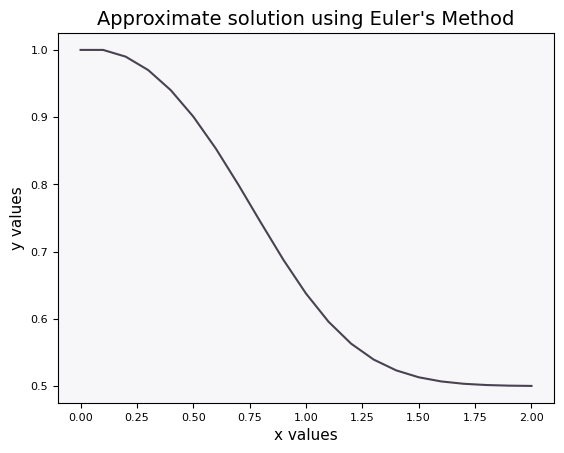

In [1427]:
# Setting a default background color 
sns.set_style(rc = {'axes.facecolor': '#f7f7f9'})

#plotting the approximate solution using Euler's Method
sns.lineplot(data=trig_values, x="xₙ", y="yₙ", color='#494351')
#formatting axis and titles
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('x values', fontsize=11)
plt.ylabel('y values', fontsize=11)
plt.title("Approximate solution using Euler's Method", fontsize=14)
plt.show()

## Newton's Law of Cooling

Newton's law of cooling states that the rate of cooling od an object is proportional to the temperature difference between the object and its surroundings, provided this difference is not too large. 

In the function below, T(t) represents the function temperature in relationship to time. T₀ represents the initial temperature, k represents the rate of cooling, t represensents time, and A represents the ambient temperature.

T(t) = (T₀ -A)$e^{-kt}$ + A

[Learn more about Newton's law of cooling](https://www.youtube.com/watch?v=_bAjWNsNrQA)

In the example below, you have made a cup of cofee ☕.  This coffee begins at 200° fahrenheit, and the ambient room temperature is 72°F. A hot beverage is considered safe to drink below 185°F.

Previous tests have shown that our coffee reaches 165° after 4 minutes.  To find the rate of cooling we can fill in the equation as follows:

165° = (200° - 72°)$e^{-k4}$ + 72°

In [1428]:
#function to solve for the rate of cooling   

def cooling_rate(T_t, T_0, A, t):
    temp_combined = (T_t-A)/(T_0 - A)
    k = -ln(temp_combined)/t
    print(f"The rate of cooling (k) equals {k:.4f}")

#Enter the temperature at time t (T_t), the initial temperature(T_0), the ambient temperature (A), and the time elapsed (t)
cooling_rate(170, 200, 72, 4)

The rate of cooling (k) equals 0.0668


In [1429]:
#function to solve for the time to reach the desired temperature  

def cooling_time(T_d, T_0, A, k):
    temp_combined = (T_d-A)/(T_0 - A)
    t =-ln(temp_combined)/k
    print(f"It will take {t:.2f} minutes to reach {T_d}°F")

#Enter the temperature at time t (T_t), the initial temperature(T_0), the ambient temperature (A), and the time elapsed (t)
cooling_time(170, 200, 72, .07)

It will take 3.82 minutes to reach 170°F


In [1430]:
#function to display a table of values as an object cools to ambient temperature

def cooling_temps(T_0, A, k):
    temperatures = []
    T_t = T_0
    time = []
    t=0
    #while loop to calculate the temperature at each time interval until the object reaches the ambient temperature
    while T_t > (A+.5):
        T_t = (T_0-A)*e**(-k*t)+A
        t += 2
        time.append(t)
        temperatures.append(T_t)
    #creates a dataframe for the cooling temperatures over time
    cooling_values = pd.DataFrame(list(zip(time, temperatures)), columns = ['Time (min)', 'Temperature (°F)'])
    cooling_values.set_index('Time (min)', inplace = True)
    cooling_values['Temperature (°F)'] = cooling_values['Temperature (°F)'].round(1)
    cooling_values['Temperature (°C)'] = ((cooling_values['Temperature (°F)'])-32)/(9/5)
    cooling_values['Temperature (°C)'] = cooling_values['Temperature (°C)'].round(1)
    return(cooling_values)

#enter the initial temperature (T_0), the ambient temperature (A), and the rate of cooling (k)
#212 degrees farhenheit is the boiling point of water
cooling_temps(212, 72, .0668)

,Temperature (°F),Temperature (°C)
Time (min),,
2,212.0,100.0
4,194.5,90.3
6,179.2,81.8
8,165.8,74.3
10,154.0,67.8
12,143.8,62.1
14,134.8,57.1
16,127.0,52.8
18,120.1,48.9


[Learn more about the US's stubborn dedication the imperial system of units](https://www.youtube.com/watch?v=JYqfVE-fykk)

## Sequences

A sequence is a list of numbers with a definite order: 

{a₁, a₂, a₃,	a₄ ...aₙ} ~also noted as {aₙ}

The number a₁ is called the first term, a₂ is the second term, and the pattern repeats until aₙ , the *nth* term. In sequences, *n* represents a positive integer ℕ.

<font size=6>{</font> ${ \Large\frac{n}{n+1} }$ <font size=6>}</font>

In the above example, the solutions are as follows: <br>
a₁ = $\frac{1}{2}$ , a₂ = $\frac{2}{3}$ , a₃ = $\frac{3}{4}$ 

This can additionally be represented as:
{aₙ} = {$\frac{1}{2}$, $\frac{2}{3}$, $\frac{3}{4}$ ... }


[Learn more about sequences](https://tutorial.math.lamar.edu/classes/calcii/Sequences.aspx)

In [1431]:
#function to create a table of solutions for a sequence
def sequence_table(n_0, n, equation):
    terms = []
    fractions = []
    a_n =[]
    
    #calculate the terms for each value of n
    for n in range(n_0, n+1):
        s = equation(n)
        terms.append(s)
        f =Fraction(s).limit_denominator()
        fractions.append(f)
        a_n.append(n)
    #creates a dataframe for the sequence
    sequence_values = pd.DataFrame(list(zip(a_n, terms, fractions)), columns = ['aₙ','Terms', 'Fractions'])
    sequence_values['Terms'] = sequence_values['Terms'].round(3)
    sequence_values.set_index('aₙ', inplace = True)
    return sequence_values

#enter the initial value of n (this is usually 1), the final value of n (the number of terms to compute), and the equation for the sequence
sequence_table(1, 20,lambda n:n/(n+1))

,Terms,Fractions
aₙ,,
1,0.500,1/2
2,0.667,2/3
3,0.750,3/4
4,0.800,4/5
5,0.833,5/6
6,0.857,6/7
7,0.875,7/8
8,0.889,8/9
9,0.900,9/10


In [1432]:
#in this example, the starting value of n must be >= 3 or the sequence will be undefined 
#no negative numbers under the square root, as we are working with real numbers
sequence_table(3, 20,lambda n:sqrt(n-3))

,Terms,Fractions
aₙ,,
3,0.000,0
4,1.000,1
5,1.414,665857/470832
6,1.732,1694157/978122
7,2.000,2
8,2.236,930249/416020
9,2.449,2093258/854569
10,2.646,2388325/902702
11,2.828,2549185/901273


In [1433]:
#another example with n in the exponent, notice that this sequence quickly converges to 0
#therefore, as n approaches infinity the limit of the sequence is 0
sequence_table(1, 15,lambda n:(n+2)/5**n)

,Terms,Fractions
aₙ,,
1,0.600,3/5
2,0.160,4/25
3,0.040,1/25
4,0.010,6/625
5,0.002,7/3125
6,0.001,8/15625
7,0.000,9/78125
8,0.000,2/78125
9,0.000,5/887784


## Series

A series is the infinite sum of a sequence as it continues to infinity.

π is a perfect example of an infinite series, as it extends exponentially until it approaches a value nearing 3.14.<br>
[Learn more about π ](https://www.youtube.com/watch?v=d-o3eB9sfls&list=PLZHQObOWTQDMVQcT3414TcPMeEYf_VtPM)

Infinite series are represented as a sum of the sequence as the value of n approaches infinity.<br><br>
$\sum_{n=1}^{\infty} aₙ$

Like a sequence, each terms are calculated for each value of n.  However, in a series, each of the values are added together:<br><br>
$\sum_{n=1}^{\infty} \frac{1}{2^n}$ = $\frac{1}{2}$ + $\frac{1}{4}$ + $\frac{1}{8}$ + $\frac{1}{16}$... 

In this example, the equation for the nth term of the infinite sum = 1 - $\frac{1}{2^n}$.  The limit of the nth partial term equals one, and therefore the infinite sum converges to one.

The table of values given by the function below helps visualize this concept.

[Learn more about infinite sums](https://www.youtube.com/watch?v=XFDM1ip5HdU)

In [1434]:
#function to create a table of solutions for a sequence
def series_table(n_0, n, equation):
    sums = []
    fractions = []
    s_n =[]
    total_sum = 0
    
    #calculate the terms for each value of n
    for n in range(n_0, n+1):
        partial_sum = equation(n)
        s = total_sum + partial_sum
        sums.append(s)
        total_sum = s
        f =Fraction(s).limit_denominator()
        fractions.append(f)
        s_n.append(n)
    #creates a dataframe for the sequence
    series_values = pd.DataFrame(list(zip(s_n,sums, fractions)), columns = ['Sₙ','Sums', 'Fractions'])
    series_values['Sums'] = series_values['Sums'].round(3)
    series_values.set_index('Sₙ', inplace = True)
    return series_values

#enter the initial value of n (this is usually 1), the final value of n (the number of terms to compute), and the equation for the sequence
series_table(1, 20,lambda n:1/(2**n))

,Sums,Fractions
Sₙ,,
1,0.500,1/2
2,0.750,3/4
3,0.875,7/8
4,0.938,15/16
5,0.969,31/32
6,0.984,63/64
7,0.992,127/128
8,0.996,255/256
9,0.998,511/512


**Another example of a converging infinite sum:**<br><br>
$\sum_{n=1}^{\infty}$ = $\frac{1}{n(n+1)}$ 

In this example, the formula for the nth partial sum (Sₙ) = 1 - 1/(n+1).  The formula for the nth partial term clearly approaches a limit of one, similar to the series above. 

In [1435]:
#be sure to add the multiplication sign between the terms in the equation
#for example, 2n must be entered as 2*n
series_table(1, 20,lambda n: 1/(n*(n+1)))

,Sums,Fractions
Sₙ,,
1,0.500,1/2
2,0.667,2/3
3,0.750,3/4
4,0.800,4/5
5,0.833,5/6
6,0.857,6/7
7,0.875,7/8
8,0.889,8/9
9,0.900,9/10


In [1436]:
#if you are only given the equation for the nth partial term, use the sequence table function  
#this table will show you if the related summand is divergent (infinitely increasing or decreasing) or convergent (approaching a limit)

#notice the final term converges to 2/3
sequence_table(30, 1000,lambda n:2*n/(3*n+5))

,Terms,Fractions
aₙ,,
30,0.632,12/19
31,0.633,31/49
32,0.634,64/101
33,0.635,33/52
34,0.636,68/107
...,...,...
996,0.666,1992/2993
997,0.666,997/1498
998,0.666,1996/2999
